In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

In [5]:
yelp = pd.read_csv('yelp.csv')

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [9]:
yelp['text length'] = yelp['text'].apply(len)

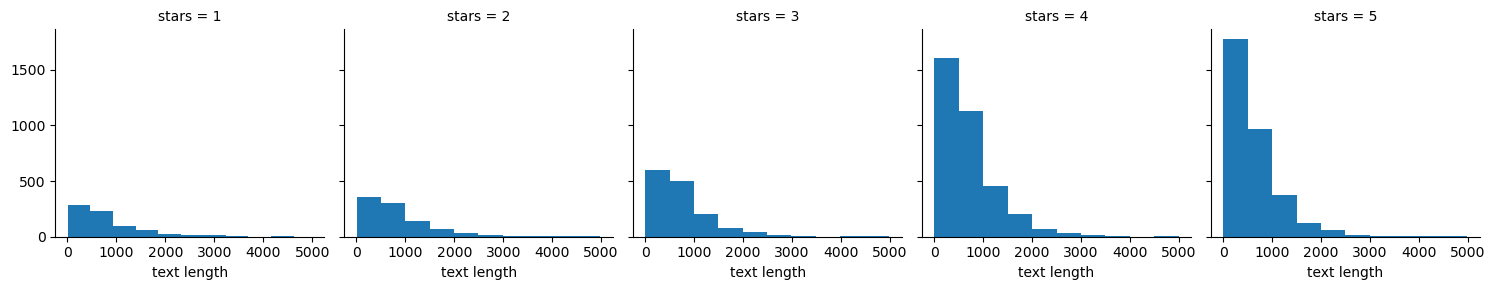

In [13]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<Axes: xlabel='stars', ylabel='text length'>

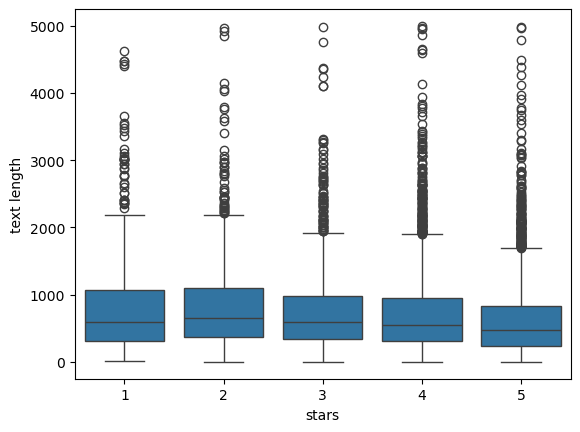

In [15]:
sns.boxplot(x='stars',y='text length',data=yelp)

<Axes: xlabel='stars', ylabel='count'>

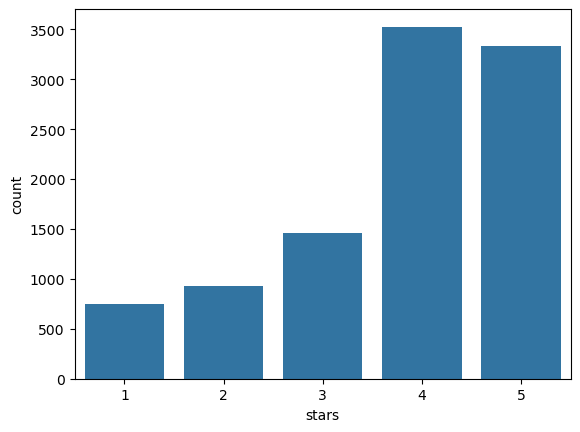

In [19]:
sns.countplot(x='stars',data=yelp)

In [21]:
yelp_class = yelp[(yelp['stars']==1) |(yelp['stars']==5) ]

In [25]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [27]:
X = yelp_class['text']
y = yelp_class['stars']

In [29]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [35]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
mess1 = 'Hey! This has some @ punctuations'
import string

In [45]:
nopunc =[]
for c in mess1:
    if c not in string.punctuation:
        nopunc.append(c)

In [47]:
nopunc

['H',
 'e',
 'y',
 ' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'h',
 'a',
 's',
 ' ',
 's',
 'o',
 'm',
 'e',
 ' ',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 's']

In [49]:
nopunc = ''.join(nopunc)

In [51]:
nopunc

'Hey This has some  punctuations'

In [53]:
bow1 = nopunc.split()

In [55]:
bow1

['Hey', 'This', 'has', 'some', 'punctuations']

In [57]:
from nltk.corpus import stopwords

In [59]:
output =[]
for c in bow1:
    if c.strip() not in stopwords.words('english'):
        output.append(c)

In [61]:
output

['Hey', 'This', 'punctuations']

In [65]:
def text_process(mess):
    nopunc =[]
    for c in mess:
        if c not in string.punctuation:
            nopunc.append(c)
    nopunc = ''.join(nopunc)
    bow1=nopunc.split()
    output =[]
    for c in bow1:
        if c.strip() not in stopwords.words('english'):
            output.append(c)
    return output

In [67]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
cv = CountVectorizer(analyzer=text_process)

In [77]:
cv.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x30c79a3e0>)

In [79]:
messages_bow = cv.fit(messages['message'])

In [81]:
messages_bow = cv.transform(messages['message'])

In [83]:
messages_bow

<5572x11617 sparse matrix of type '<class 'numpy.int64'>'
	with 56024 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [103]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [105]:
yelp = pd.read_csv('yelp.csv')

In [107]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


<Axes: >

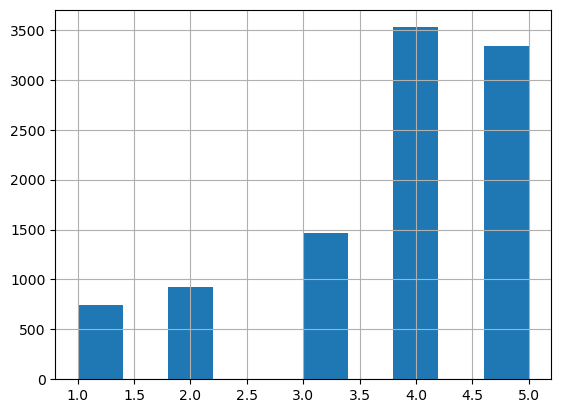

In [115]:
yelp['stars'].hist()

In [117]:
yelp.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [119]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [121]:
yelp['text_length'] = yelp['text'].apply(len)

In [123]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

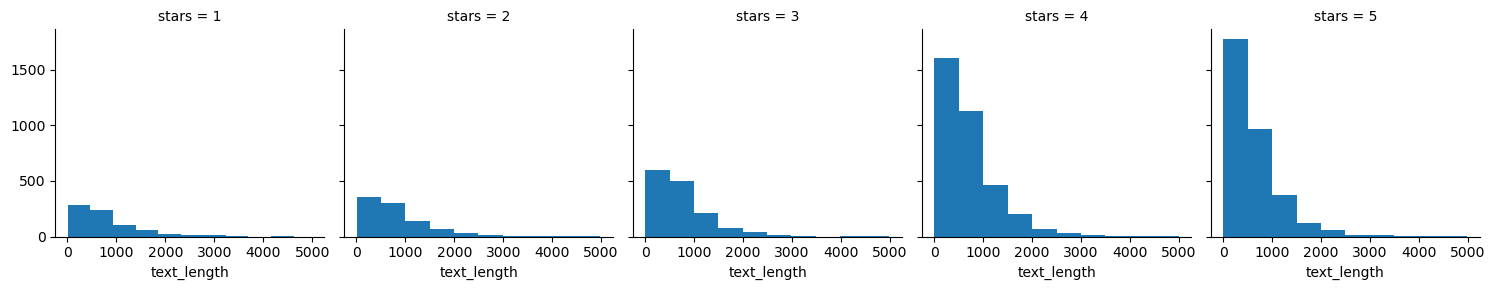

In [133]:
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text_length')

/var/folders/8c/d_5zdd650s140z1kv551mrfr0000gn/T/ipykernel_11656/4021066030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='text_length'>

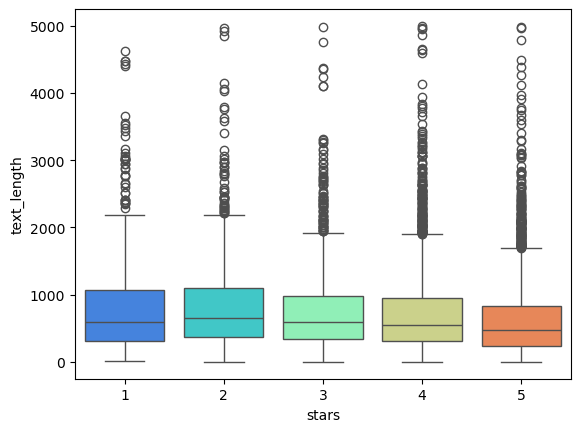

In [139]:
sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')

In [145]:
stars = yelp.groupby('stars').mean()
stars

TypeError: agg function failed [how->mean,dtype->object]

In [153]:
yelp_data = yelp[(yelp['stars']==1) |(yelp['stars']==5) ]

In [211]:
yelp_data.head(20)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0,433
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0,363


In [157]:
X = yelp_class['text']
y = yelp_class['stars']

In [159]:
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [165]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [163]:
bow = CountVectorizer()

In [171]:
b = bow.fit(X_train)

In [173]:
b

CountVectorizer()

In [179]:
X_train_bow = bow.transform(X_train)

In [213]:
X_train_bow

<2860x16218 sparse matrix of type '<class 'numpy.int64'>'
	with 220980 stored elements in Compressed Sparse Row format>

In [181]:
X_test_bow = bow.transform(X_test)

In [215]:
X_test_bow

<1226x16218 sparse matrix of type '<class 'numpy.int64'>'
	with 93011 stored elements in Compressed Sparse Row format>

In [183]:
from sklearn.feature_extraction.text import TfidfTransformer

In [185]:
tfidf_scaler = TfidfTransformer().fit(X_train_bow)

In [187]:
X_train_tfidf = tfidf_scaler.transform(X_train_bow)

In [189]:
X_test_tfidf = tfidf_scaler.transform(X_test_bow)

In [191]:
from sklearn.naive_bayes import MultinomialNB

In [193]:
mob = MultinomialNB()

In [197]:
mob.fit(X_train_tfidf,y_train)

MultinomialNB()

In [201]:
predictions = mob.predict(X_test_tfidf)

In [203]:
predictions

array([5, 5, 5, ..., 5, 5, 5])

In [205]:
from sklearn.metrics import classification_report

In [209]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      1.00      0.01         1
           5       1.00      0.81      0.90      1225

    accuracy                           0.81      1226
   macro avg       0.50      0.91      0.45      1226
weighted avg       1.00      0.81      0.89      1226



In [219]:
b1 = bow.fit(X)

In [223]:
X = bow.transform(X)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [229]:
nb.fit(X_train,y_train)

MultinomialNB()

In [231]:
predictions1 = nb.predict(X_test)

In [233]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           1       0.81      0.67      0.73       233
           5       0.93      0.96      0.94       993

    accuracy                           0.91      1226
   macro avg       0.87      0.82      0.84      1226
weighted avg       0.90      0.91      0.90      1226



In [235]:
from sklearn.pipeline import Pipeline

In [243]:
pip = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [247]:
X = yelp_class['text']
y = yelp_class['stars']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [251]:
pip.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [255]:
predictions = pip.predict(X_test)

In [257]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       233
           5       0.81      1.00      0.90       993

    accuracy                           0.81      1226
   macro avg       0.91      0.50      0.45      1226
weighted avg       0.85      0.81      0.73      1226



In [259]:
pip1 = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [263]:
pip1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [269]:
predictions2 = pip1.predict(X_test)

In [271]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           1       0.86      0.64      0.73       233
           5       0.92      0.97      0.95       993

    accuracy                           0.91      1226
   macro avg       0.89      0.81      0.84      1226
weighted avg       0.91      0.91      0.91      1226

